# 🛒 Superstore Profit Prediction with Time & Categorical Features
### Objective:
Predict monthly profit using engineered time-based and categorical features, and compare model performance using:
- Random Forest
- XGBoost
- MLP Regressor

Evaluation Metrics:
- RMSE
- MAE
- R²
- MAPE (%)

## 1. Load and Prepare Dataset

In [3]:

import pandas as pd

df = pd.read_excel("Sample - Superstore.xls")
df.columns = df.columns.str.strip()
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])

# Feature engineering: time
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Quarter'] = df['Order Date'].dt.quarter

# Drop ID columns and date columns
df = df.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Customer Name', 'Order Date', 'Ship Date'], axis=1)
df.head()


,Ship Mode,Segment,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Order_Quarter
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2020,11,4
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2020,11,4
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2020,6,2
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2019,10,4
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2019,10,4


## 2. Encode Categorical Features

In [5]:

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Postal Code,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Order_Quarter,Ship Mode_Same Day,Ship Mode_Second Class,...,Product Name_Zebra ZM400 Thermal Label Printer,Product Name_Zebra Zazzle Fluorescent Highlighters,Product Name_Zipper Ring Binder Pockets,Product Name_i.Sound Portable Power - 8000 mAh,Product Name_iHome FM Clock Radio with Lightning Dock,"Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",Product Name_iOttie HLCRIO102 Car Mount,Product Name_iOttie XL Car Mount,Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,Product Name_netTALK DUO VoIP Telephone Service
0,42420.0,261.9600,2,0.00,41.9136,2020,11,4,False,True,...,False,False,False,False,False,False,False,False,False,False
1,42420.0,731.9400,3,0.00,219.5820,2020,11,4,False,True,...,False,False,False,False,False,False,False,False,False,False
2,90036.0,14.6200,2,0.00,6.8714,2020,6,2,False,True,...,False,False,False,False,False,False,False,False,False,False
3,33311.0,957.5775,5,0.45,-383.0310,2019,10,4,False,False,...,False,False,False,False,False,False,False,False,False,False
4,33311.0,22.3680,2,0.20,2.5164,2019,10,4,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:

from sklearn.model_selection import train_test_split

X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

train_rf = rf.predict(X_train_scaled)
test_rf = rf.predict(X_test_scaled)

print("Random Forest:")
print("Train RMSE:", mean_squared_error(y_train, train_rf, squared=False))
print("Test RMSE:", mean_squared_error(y_test, test_rf, squared=False))
print("Train MAE:", mean_absolute_error(y_train, train_rf))
print("Test MAE:", mean_absolute_error(y_test, test_rf))
print("Train R²:", r2_score(y_train, train_rf))
print("Test R²:", r2_score(y_test, test_rf))
print("Test MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_test, test_rf) * 100))


Random Forest:
Train RMSE: 46.99980958273217
Test RMSE: 230.23959784223328
Train MAE: 7.244653304815506
Test MAE: 25.746281913456734
Train R²: 0.9608672914125544
Test R²: -0.09333061593403813
Test MAPE: 189094509736141088.00%


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [9]:

from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train_scaled, y_train)

train_xgb = xgb.predict(X_train_scaled)
test_xgb = xgb.predict(X_test_scaled)

print("XGBoost:")
print("Train RMSE:", mean_squared_error(y_train, train_xgb, squared=False))
print("Test RMSE:", mean_squared_error(y_test, test_xgb, squared=False))
print("Train MAE:", mean_absolute_error(y_train, train_xgb))
print("Test MAE:", mean_absolute_error(y_test, test_xgb))
print("Train R²:", r2_score(y_train, train_xgb))
print("Test R²:", r2_score(y_test, test_xgb))
print("Test MAPE: {:.2f}%".format(mean_absolute_percentage_error(y_test, test_xgb) * 100))


XGBoost:
Train RMSE: 19.998472497648216
Test RMSE: 116.98860229722091
Train MAE: 10.715304431023034
Test MAE: 22.25354322391261
Train R²: 0.99291497540503
Test R²: 0.717720994800747
Test MAPE: 101216592610494768.00%


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Clean training data
train_mask = ~np.isnan(X_train_scaled).any(axis=1)
X_train_clean = X_train_scaled[train_mask]
y_train_clean = y_train[train_mask]

# Clean test data
test_mask = ~np.isnan(X_test_scaled).any(axis=1)
X_test_clean = X_test_scaled[test_mask]
y_test_clean = y_test[test_mask]

# Fit the model
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, early_stopping=True, random_state=42)
mlp.fit(X_train_clean, y_train_clean)

# Predict
train_preds = mlp.predict(X_train_clean)
test_preds = mlp.predict(X_test_clean)

# Evaluate
print("MLP Regressor Evaluation:")
print(f"Train RMSE: {mean_squared_error(y_train_clean, train_preds, squared=False):.2f}")
print(f"Test RMSE: {mean_squared_error(y_test_clean, test_preds, squared=False):.2f}")
print(f"Train MAE: {mean_absolute_error(y_train_clean, train_preds):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test_clean, test_preds):.2f}")
print(f"Train R²: {r2_score(y_train_clean, train_preds):.3f}")
print(f"Test R²: {r2_score(y_test_clean, test_preds):.3f}")
print(f"Test MAPE: {mean_absolute_percentage_error(y_test_clean, test_preds) * 100:.2f}%")



MLP Regressor Evaluation:
Train RMSE: 173.19
Test RMSE: 212.12
Train MAE: 42.89
Test MAE: 73.30
Train R²: 0.468
Test R²: 0.072
Test MAPE: 151607923140966976.00%


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


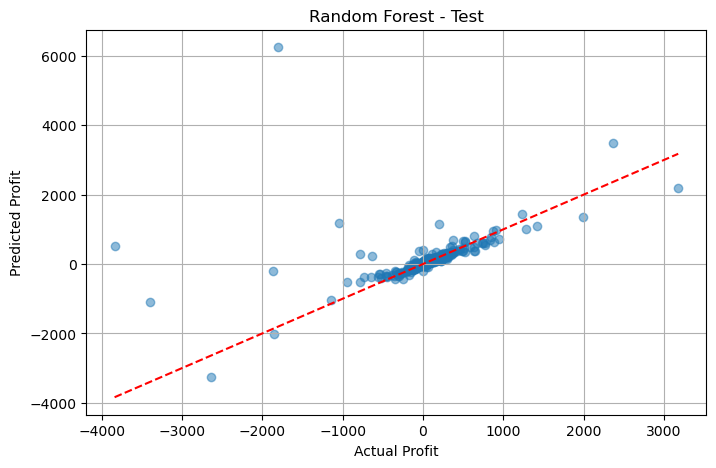

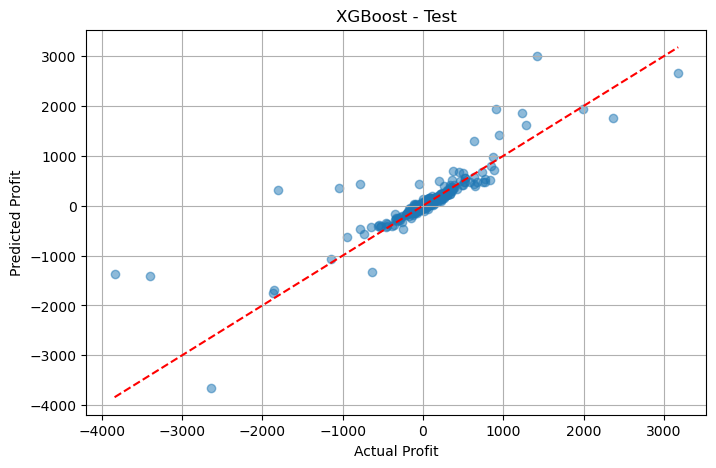

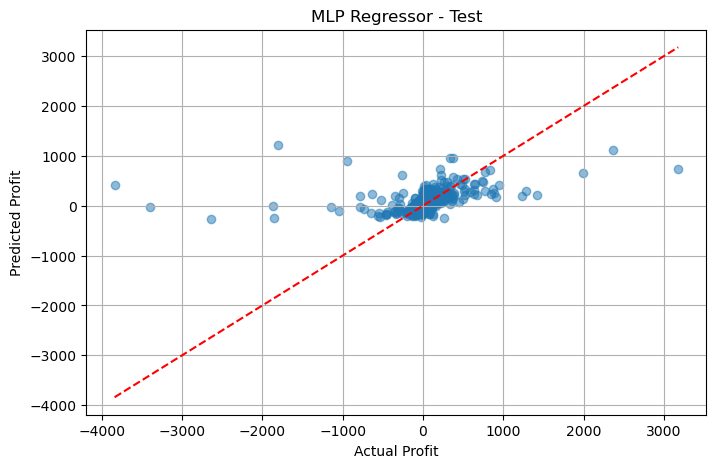

In [11]:

import matplotlib.pyplot as plt

def plot_preds(y_true, y_pred, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title(title)
    plt.xlabel("Actual Profit")
    plt.ylabel("Predicted Profit")
    plt.grid(True)
    plt.show()

# Use original test sets for RF and XGB
plot_preds(y_test, test_rf, "Random Forest - Test")
plot_preds(y_test, test_xgb, "XGBoost - Test")

# Use cleaned version for MLP
plot_preds(y_test_clean.reset_index(drop=True), test_preds, "MLP Regressor - Test")

